In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from face_tally.ml_logic.image_prediction import predict_bounding_boxes, create_image

from ultralytics import YOLO
import numpy as np
from PIL import Image
from pillow_heif import register_heif_opener


/home/matias/.pyenv/versions/3.10.6/envs/facetally/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Getting Original Images size

In [3]:
# Ruta de la imagen
ruta_input = 'trial_images/dimensions_input.jpg'
ruta_output = 'trial_images/dimensions_output.jpg'

# Cargar la imagen con Pillow
imagen_input = Image.open(ruta_input)
imagen_output = Image.open(ruta_output)


# Convertir la imagen a un arreglo NumPy
input_array = np.array(imagen_input)
output_array = np.array(imagen_output)


# Obtener las dimensiones del arreglo NumPy
dimensiones_input = input_array.shape
dimensiones_output = output_array.shape

# Imprimir las dimensiones
print("Dimensiones de input:", dimensiones_input)
print("Dimensiones de output:", dimensiones_output)


Dimensiones de input: (438, 778, 3)
Dimensiones de output: (438, 778, 3)


### Important Conclusion:

Now we know that streamlit creates pictures for both input and output that have those dimensions:
- (438, 778, 3)

In [4]:
model = YOLO("yolov8n.pt")


In [5]:
image_file_path = "trial_images/random_family_pic.jpg"

image_prereshape = Image.open(image_file_path)
model_shape = (778, 438)

image = image_prereshape.resize(model_shape)
array_original_image = np.array(image)

print("New dimensions of the image:", array_original_image.shape)


New dimensions of the image: (438, 778, 3)


In [65]:
bbs = predict_bounding_boxes(image, model)
created_image = create_image(array_original_image, bbs)


0: 384x640 4 persons, 287.8ms
Speed: 8.5ms preprocess, 287.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


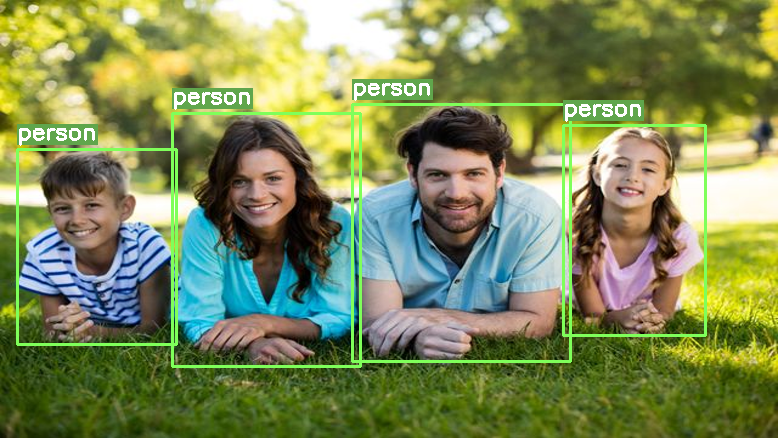

In [66]:
Image.fromarray(created_image)


In [38]:
bbs


[{'Object type': 'person',
  'Coordinates': [352.89361572265625,
   104.20563507080078,
   570.2696533203125,
   361.8034973144531],
  'Probability': 0.9},
 {'Object type': 'person',
  'Coordinates': [563.9219360351562,
   125.31031799316406,
   705.1417236328125,
   335.9823303222656],
  'Probability': 0.89},
 {'Object type': 'person',
  'Coordinates': [17.274911880493164,
   149.77069091796875,
   176.73397827148438,
   344.73626708984375],
  'Probability': 0.88},
 {'Object type': 'person',
  'Coordinates': [172.75103759765625,
   113.42707824707031,
   360.0440979003906,
   366.4022216796875],
  'Probability': 0.86}]